In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [64]:
file = np.load('correlation.npy')

In [65]:
xir = np.mean(file,axis=0)

In [42]:
xir.shape

(30, 60)

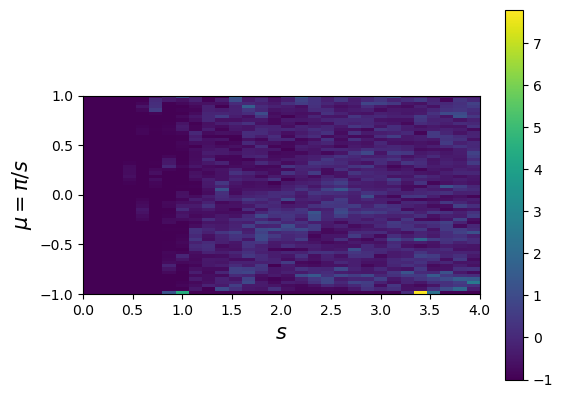

In [168]:
file = np.load('correlation.npy')
xir = np.mean(file,axis=0)
extent=(0,4,-1,1)
plt.imshow(xir.T,origin='lower',extent=extent)#,cmap='jet',vmin=-1,vmax=1)
plt.xlabel('$s$',size=15)
plt.ylabel('$\\mu=\\pi/s$',size=15)
plt.colorbar()

In [169]:
file[10,29,:]

IndexError: index 10 is out of bounds for axis 0 with size 1

In [170]:
def P2(mu):
    polinomio = (3*(mu**2) -1)/2
    #polinomio = mu
    return polinomio

In [171]:
bines_mu = xir.shape[1]
bines_s = xir.shape[0]

nmues = np.linspace(-1,1,bines_mu + 1)
mues = np.zeros(len(nmues)-1)
abin_mu = nmues[1]-nmues[0]
for i in range(len(nmues)-1):
    mues[i] = nmues[i] + abin_mu/2
    
neses = np.linspace(0,4,bines_s+1)
eses = np.zeros(len(neses)-1)
abin_s = neses[1]-neses[0]
for i in range(len(neses)-1):
    eses[i] = neses[i] + abin_s/2

In [172]:
xi0 = []
xi2 = []
for i in range(bines_s):
    xi0.append(np.mean(xir[i,:]))
    xi2_values = []
    for j in range(bines_mu):
        mu = mues[j]
        p2 = P2(mu)
        xi2_values.append(xir[i,j]*p2)
    
    xi2.append(np.mean(xi2_values))
    
xi2 = (5/2)*np.array(xi2)
xi0 = np.array(xi0)
eses = np.array(eses)

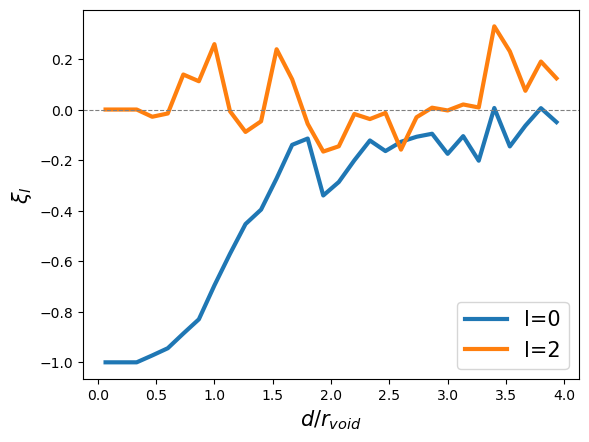

In [174]:
plt.plot(eses,xi0,label='l=0',lw=3)
plt.plot(eses,xi2,label='l=2',lw=3)
plt.ylabel('$ \\xi_l $', size=15)
plt.xlabel('$ d/r_{void} $',size=15)
plt.legend(fontsize=15)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

In [100]:
abin_s

0.13333333333333333

In [ ]:
xi2 = np.zeros(nbines_sigma)

def P2(mu):
    polinomio = (3*(mu**2) -1)/2
    #polinomio = mu
    return polinomio

for i in range(nbines_sigma):
    sigma = rango_dist[i]
    for j in range(nbines_pi):
        pi = rango_dist_pi[j]
        
        # calculo s
        s = np.sqrt(sigma**2 + pi**2)      
        nbin = int(s/abin)

        # calculo mu
        mu = pi/s
        p2 = P2(mu)
        
        if not np.isnan(xir[i,j]):
        
            xi2[nbin]   += xir[i,j]*p2
            count[nbin] += 1

xi2 = (5/2)*(xi2/count)

In [137]:
radios = np.linspace(20,40,21)
radios 

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 35., 36., 37., 38., 39., 40.])

In [142]:
import time

start_time = time.time()
for i in range(1000):
    k = 5*8
    
print(time.time()-start_time)

0.00021791458129882812


# Monopolo

### - Promediar los pares $(\sigma_i , \pi_j) $ que corresponden a diferentes valores de $ s_{ij}=\sqrt{\sigma_i^2 + \pi_j^2} $

In [30]:
rmax = 4
rmin = 0

nbines_sigma = xir.shape[0]
nbines_pi = xir.shape[1]
rango_dist = np.linspace(rmin,rmax,nbines_sigma + 1)
rango_dist = rango_dist[:nbines_sigma]

rango_dist_pi = np.linspace(-4,4,nbines_pi+1)[:nbines_pi]

xi0 = np.zeros(nbines_sigma)
count = np.zeros(nbines_sigma)

abin = (rmax-rmin)/nbines_sigma

In [31]:
for i in range(nbines_sigma):
    sigma = rango_dist[i]
    for j in range(nbines_pi):
        pi = rango_dist_pi[j]
        s = np.sqrt(sigma**2 + pi**2)      
        nbin = int(s/abin)
        #print(sigma,pi,s,nbin)
        if not np.isnan(xir[i,j]):
            #print(s)
            xi0[nbin] += xir[i,j]
            count[nbin] +=1

xi0 = xi0/count

Text(0.5, 0, '$ d/r_{void} $')

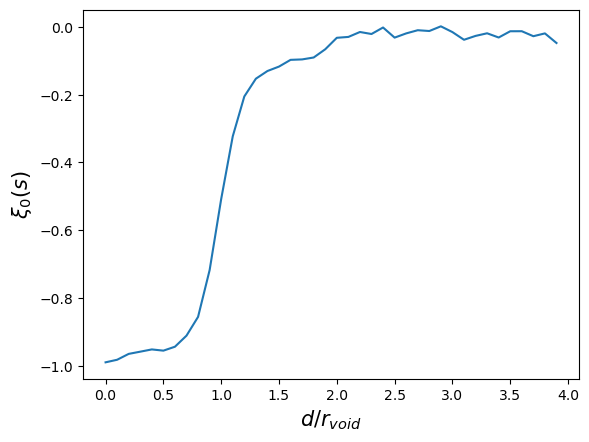

In [32]:
plt.plot(rango_dist,xi0)
plt.ylabel('$\\xi_0(s)$',size=15)
plt.xlabel('$ d/r_{void} $',size=15)

# Cuadrupolo
### - Calcular $ s_{ij}=\sqrt{\sigma_i^2 + \pi_j^2} $ para cada $(\sigma_i , \pi_j) $
### - Calcular $ \mu_{ij} = \frac{\pi_j}{s_{ij}} $ $(\sigma_i , \pi_j) $
### - Evaluar $P_2(\mu_{ij})$ para cada par $(\sigma_i , \pi_j) $
### - Hacer la suma ponderada de la matriz xir multiplicada por $P_2(\mu_{ij})$

In [33]:
xi2 = np.zeros(nbines_sigma)

def P2(mu):
    polinomio = (3*(mu**2) -1)/2
    #polinomio = mu
    return polinomio

for i in range(nbines_sigma):
    sigma = rango_dist[i]
    for j in range(nbines_pi):
        pi = rango_dist_pi[j]
        
        # calculo s
        s = np.sqrt(sigma**2 + pi**2)      
        nbin = int(s/abin)

        # calculo mu
        mu = pi/s
        p2 = P2(mu)
        
        if not np.isnan(xir[i,j]):
        
            xi2[nbin]   += xir[i,j]*p2
            count[nbin] += 1

xi2 = (5/2)*(xi2/count)

/home/arodriguez/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


Text(0.5, 0, '$ d/r_{void} $')

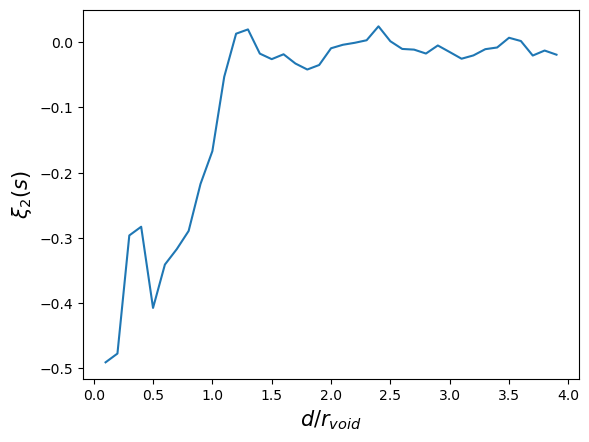

In [34]:
plt.plot(rango_dist,xi2)
plt.ylabel('$\\xi_2(s)$',size=15)
plt.xlabel('$ d/r_{void} $',size=15)

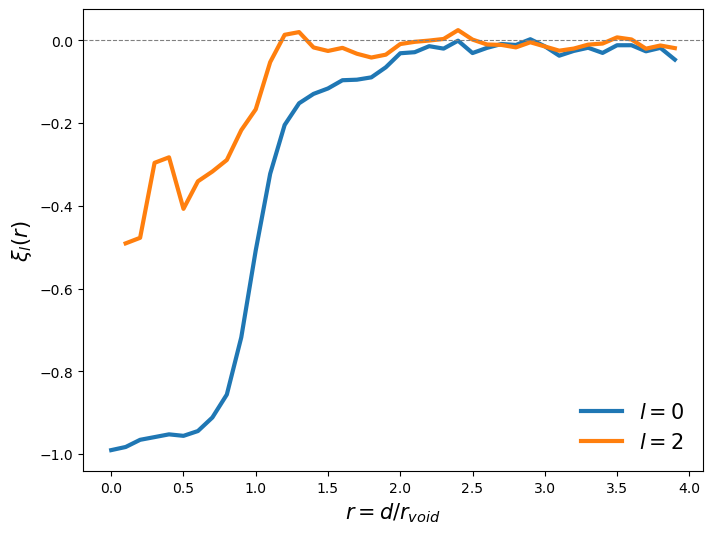

In [35]:
plt.figure(figsize=(8,6))

plt.plot(rango_dist,xi0,label='$ l=0$',lw=3)
plt.plot(rango_dist,xi2,label='$l=2$',lw=3)
plt.legend(fontsize=15,frameon=False)
plt.ylabel('$\\xi_l(r)$',size=15)
plt.xlabel('$ r=d/r_{void} $',size=15)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8)

# Version interponaldo

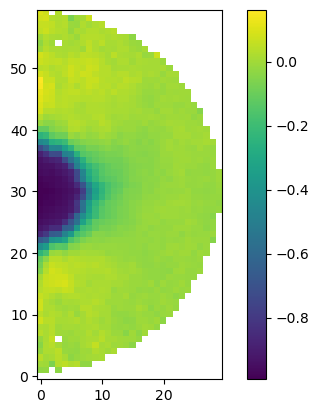

In [50]:
file = np.load('correlation.npy')
plt.imshow(xir.T,origin='lower')#,cmap='jet',vmin=-1,vmax=1)
plt.colorbar()

In [61]:
# Número de puntos
num_puntos = 100
def semi_circle(num_points, radio):
    angulos = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
    # Coordenadas del círculo
    x = np.cos(angulos)*radio
    y = np.sin(angulos)*radio
    mask, = np.where(x >= 0)
    return x[mask],y[mask]

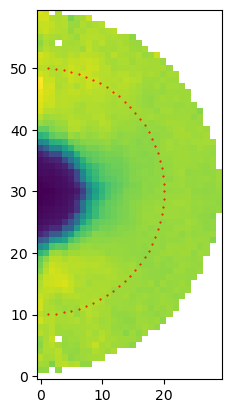

In [63]:
x, y = semi_circle(100,20)
plt.imshow(xir.T,origin='lower')#,cmap='jet',vmin=-1,vmax=1)
plt.plot(x,y+30,ls='none',marker='o', color='red',markersize=.5)

In [90]:
tita = np.linspace(-1,1,10)
pol = 0
cuenta = 0
for i in tita:
    pol += P2(i)
    
    #pol.append(P2(i))
    

In [91]:
pol*2/10

0.22222222222222215

In [104]:
def pi_coord(pz,z,lbox):
    dz = abs(pz - z)
    if dz > lbox/2:
        dz = -(lbox - dz)
    
    if (pz-z)<0:
        dz = -dz
    
    return dz

In [105]:
pi_coord(21,10,20)

-9

In [6]:
int(-1.1)

-1

In [16]:
def periodicidad(nbin, bines):
    return (nbin % (bines) + (bines)) % (bines)

def generar_bines(binx, biny, binz, nbines, ngrid):
    rango_i = range(binx - nbines, binx + nbines + 1)
    rango_j = range(biny - nbines, biny + nbines + 1)
    rango_k = range(binz - nbines, binz + nbines + 1)
    
    bines_alrededor = [
        (periodicidad(i, ngrid), periodicidad(j, ngrid), periodicidad(k, ngrid))
        for i in rango_i for j in rango_j for k in rango_k
    ]
    
    return bines_alrededor

In [34]:
%time
periodicidad(-2,10)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


8

In [35]:
%time
generar_bines(3,3,3,1,10)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


[(2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 2, 2),
 (3, 2, 3),
 (3, 2, 4),
 (3, 3, 2),
 (3, 3, 3),
 (3, 3, 4),
 (3, 4, 2),
 (3, 4, 3),
 (3, 4, 4),
 (4, 2, 2),
 (4, 2, 3),
 (4, 2, 4),
 (4, 3, 2),
 (4, 3, 3),
 (4, 3, 4),
 (4, 4, 2),
 (4, 4, 3),
 (4, 4, 4)]

In [13]:
def periodicidad_old(nbin,bines):
    
    if (nbin==bines):
            bin_out = 0
    #if (nbin==bines + 1): 
    #        bin_out = 1
    elif (nbin<0):
            bin_out = bines + nbin
    elif (nbin>bines):
            bin_out = nbin - (bines + 1)
    else :
            bin_out = nbin
    
    return bin_out



def generar_bines_old(binx, biny, binz, nbines, ngrid):
    
    bines_alrededor = []
    
    for i in range(binx - nbines, binx + nbines + 1):
        
        ibin = periodicidad(i,ngrid)
        
        for j in range(biny - nbines, biny + nbines + 1):
        
            jbin = periodicidad(j,ngrid)

            for k in range(binz - nbines, binz + nbines + 1):
        
                kbin = periodicidad(k,ngrid)

                bines_alrededor.append((ibin, jbin,kbin))
    
    return bines_alrededor

In [33]:
%%time
periodicidad_old(-2,10)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


8

In [41]:
%time
if generar_bines_old(3,3,3,0,10) == generar_bines(3,3,3,0,10):
    print('ok')

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 4.29 µs
ok


In [57]:
%time
for i in range(20):
    a = generar_bines_old(3,3,3,2,10+i)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


In [58]:
%time
for i in range(20):
    a = generar_bines(3,3,3,2,10+i)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.53 µs
